In [ ]:
# step 1. monthly temp January July

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

yr_list = []

imgw_page = 'https://dane.imgw.pl/data/dane_pomiarowo_obserwacyjne/dane_meteorologiczne/miesieczne/klimat/'
page = urlopen(imgw_page)
soup = BeautifulSoup(page, 'html.parser')

for link in soup.find_all('a', href=True):
    if str(link.string)[0].isdigit():
        yr_list.append(str(link.string)[:-1])
print(yr_list)

['1951_1955', '1956_1960', '1961_1965', '1966_1970', '1971_1975', '1976_1980', '1981_1985', '1986_1990', '1991_1995', '1996_2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']


In [2]:
import pandas as pd

df = pd.read_fwf('https://dane.imgw.pl/data/dane_pomiarowo_obserwacyjne/dane_meteorologiczne/miesieczne/klimat/k_m_t_format.txt', header=None)
head_list = df[0].values.tolist()

del head_list[-1]

for x in range(len(head_list)):
    head_list[x] = head_list[x].split("  ")[0]
    head_list[x] = head_list[x].split(" 6")[0]
print(head_list)

['Kod stacji', 'Nazwa stacji', 'Rok', 'Miesiąc', 'Średnia miesięczna temperatura [°C]', 'Status pomiaru TEMP', 'Średnia miesięczna wilgotność względna [%]', 'Status pomiaru WLGS', 'Średnia miesięczna prędkość wiatru [m/s]', 'Status pomiaru FWS', 'Średnie miesięczne zachmurzenie ogólne [oktanty]', 'Status pomiaru NOS']


In [3]:
from zipfile import ZipFile
from io import BytesIO
from urllib.request import urlopen

temp_df = pd.DataFrame()

for obs_year in yr_list:
    url = urlopen('https://dane.imgw.pl/data/dane_pomiarowo_obserwacyjne/dane_meteorologiczne/miesieczne/klimat/' + obs_year + '/' + obs_year + '_m_k.zip')
    file = ZipFile(BytesIO(url.read()))
    climate_csv = file.open('k_m_t_' + obs_year + '.csv')
    temp_yr_df = pd.read_csv(climate_csv, header=None, encoding ='windows-1250', names=head_list)
    temp_df = pd.concat([temp_df, temp_yr_df], ignore_index=True)
    
temp_df

,Kod stacji,Nazwa stacji,Rok,Miesiąc,Średnia miesięczna temperatura [°C],Status pomiaru TEMP,Średnia miesięczna wilgotność względna [%],Status pomiaru WLGS,Średnia miesięczna prędkość wiatru [m/s],Status pomiaru FWS,Średnie miesięczne zachmurzenie ogólne [oktanty],Status pomiaru NOS
0,249200180,LIMANOWA,1952,1,-0.9,NaN,80.3,NaN,3.9,NaN,5.9,NaN
1,249200180,LIMANOWA,1952,2,-2.4,NaN,87.3,NaN,4.4,NaN,7.7,NaN
2,249200180,LIMANOWA,1952,3,-4.9,NaN,78.2,NaN,3.6,NaN,4.8,NaN
3,249200180,LIMANOWA,1952,4,8.6,NaN,78.3,NaN,1.9,NaN,3.8,NaN
4,249200180,LIMANOWA,1952,5,9.9,NaN,80.5,NaN,3.1,NaN,6.4,NaN
5,249200180,LIMANOWA,1952,6,14.3,NaN,79.9,NaN,2.7,NaN,5.7,NaN
6,249200180,LIMANOWA,1952,7,16.5,NaN,76.9,NaN,2.2,NaN,3.6,NaN
7,249200180,LIMANOWA,1952,8,17.4,NaN,80.2,NaN,2.5,NaN,3.9,NaN
8,249200180,LIMANOWA,1952,9,11.1,NaN,83.7,NaN,3.6,NaN,5.8,NaN
9,249200180,LIMANOWA,1952,10,7.0,NaN,85.0,NaN,3.2,NaN,6.4,NaN


In [4]:
temp_df = temp_df.sort_values(['Rok', 'Nazwa stacji', 'Miesiąc'])

temp_df

,Kod stacji,Nazwa stacji,Rok,Miesiąc,Średnia miesięczna temperatura [°C],Status pomiaru TEMP,Średnia miesięczna wilgotność względna [%],Status pomiaru WLGS,Średnia miesięczna prędkość wiatru [m/s],Status pomiaru FWS,Średnie miesięczne zachmurzenie ogólne [oktanty],Status pomiaru NOS
1433,252239995,BIAŁA PODLASKA,1951,1,-2.5,NaN,82.6,NaN,4.2,NaN,5.9,NaN
1434,252239995,BIAŁA PODLASKA,1951,2,-1.7,NaN,86.4,NaN,4.0,NaN,6.0,NaN
1435,252239995,BIAŁA PODLASKA,1951,3,0.2,NaN,81.8,NaN,3.7,NaN,6.8,NaN
1436,252239995,BIAŁA PODLASKA,1951,4,9.0,NaN,69.2,NaN,3.4,NaN,4.3,NaN
1437,252239995,BIAŁA PODLASKA,1951,5,12.1,NaN,74.0,NaN,3.2,NaN,5.5,NaN
1438,252239995,BIAŁA PODLASKA,1951,6,17.9,NaN,68.0,NaN,2.6,NaN,4.5,NaN
1439,252239995,BIAŁA PODLASKA,1951,7,18.5,NaN,72.2,NaN,2.8,NaN,4.3,NaN
1440,252239995,BIAŁA PODLASKA,1951,8,20.0,NaN,69.6,NaN,2.3,NaN,3.5,NaN
1441,252239995,BIAŁA PODLASKA,1951,9,15.0,NaN,74.1,NaN,2.8,NaN,3.9,NaN
1442,252239995,BIAŁA PODLASKA,1951,10,4.4,NaN,79.2,NaN,2.9,NaN,4.5,NaN


In [16]:
single_yr_list = temp_df["Rok"].drop_duplicates().tolist()

print(single_yr_list)

[1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


In [7]:
temp_jan_df = temp_df.loc[(temp_df['Nazwa stacji'].str.contains('WARSZAWA-BIELANY')) & (temp_df['Miesiąc'] == 1)].copy()
temp_jan_df = temp_jan_df.reset_index(drop=True)
temp_jan_df = temp_jan_df.dropna(how='all', axis=1)
temp_jan_df

,Kod stacji,Nazwa stacji,Rok,Miesiąc,Średnia miesięczna temperatura [°C],Średnia miesięczna wilgotność względna [%],Średnia miesięczna prędkość wiatru [m/s],Średnie miesięczne zachmurzenie ogólne [oktanty]
0,252200150,WARSZAWA-BIELANY,1951,1,-1.7,82.3,4.9,6.3
1,252200150,WARSZAWA-BIELANY,1952,1,0.0,82.4,3.7,6.9
2,252200150,WARSZAWA-BIELANY,1953,1,-2.1,87.9,4.0,7.2
3,252200150,WARSZAWA-BIELANY,1954,1,-7.7,80.1,4.0,6.1
4,252200150,WARSZAWA-BIELANY,1955,1,-2.9,84.1,3.9,6.5
5,252200150,WARSZAWA-BIELANY,1956,1,-1.5,81.1,4.3,6.2
6,252200150,WARSZAWA-BIELANY,1957,1,-1.1,89.0,3.3,6.0
7,252200150,WARSZAWA-BIELANY,1958,1,-2.6,88.0,2.6,6.1
8,252200150,WARSZAWA-BIELANY,1959,1,-0.8,85.6,3.7,6.3
9,252200150,WARSZAWA-BIELANY,1960,1,-2.5,86.0,2.9,7.0


In [8]:
temp_jul_df = temp_df.loc[(temp_df['Nazwa stacji'].str.contains('WARSZAWA-BIELANY')) & (temp_df['Miesiąc'] == 7)].copy()
temp_jul_df = temp_jul_df.reset_index(drop=True)
temp_jul_df = temp_jul_df.dropna(how='all', axis=1)
temp_jul_df

,Kod stacji,Nazwa stacji,Rok,Miesiąc,Średnia miesięczna temperatura [°C],Średnia miesięczna wilgotność względna [%],Średnia miesięczna prędkość wiatru [m/s],Średnie miesięczne zachmurzenie ogólne [oktanty]
0,252200150,WARSZAWA-BIELANY,1951,7,19.0,68.5,3.1,5.1
1,252200150,WARSZAWA-BIELANY,1952,7,19.7,60.9,2.4,4.0
2,252200150,WARSZAWA-BIELANY,1953,7,20.9,68.0,2.4,4.8
3,252200150,WARSZAWA-BIELANY,1954,7,17.5,77.1,2.6,5.9
4,252200150,WARSZAWA-BIELANY,1955,7,19.6,75.2,4.9,4.8
5,252200150,WARSZAWA-BIELANY,1956,7,17.8,75.5,3.1,4.9
6,252200150,WARSZAWA-BIELANY,1957,7,19.5,76.1,2.8,5.2
7,252200150,WARSZAWA-BIELANY,1958,7,19.3,71.5,2.5,4.2
8,252200150,WARSZAWA-BIELANY,1959,7,21.6,73.2,2.4,4.4
9,252200150,WARSZAWA-BIELANY,1960,7,17.2,81.0,3.1,6.0


In [10]:
temp_jan_list = temp_jan_df["Średnia miesięczna temperatura [°C]"].tolist()
print(len(temp_jan_list))

69


In [27]:
temp_jul_list = temp_jul_df["Średnia miesięczna temperatura [°C]"].tolist()
# no July 2019
temp_jul_list.append(None)
print(len(temp_jul_list))

69


In [18]:
%matplotlib inline

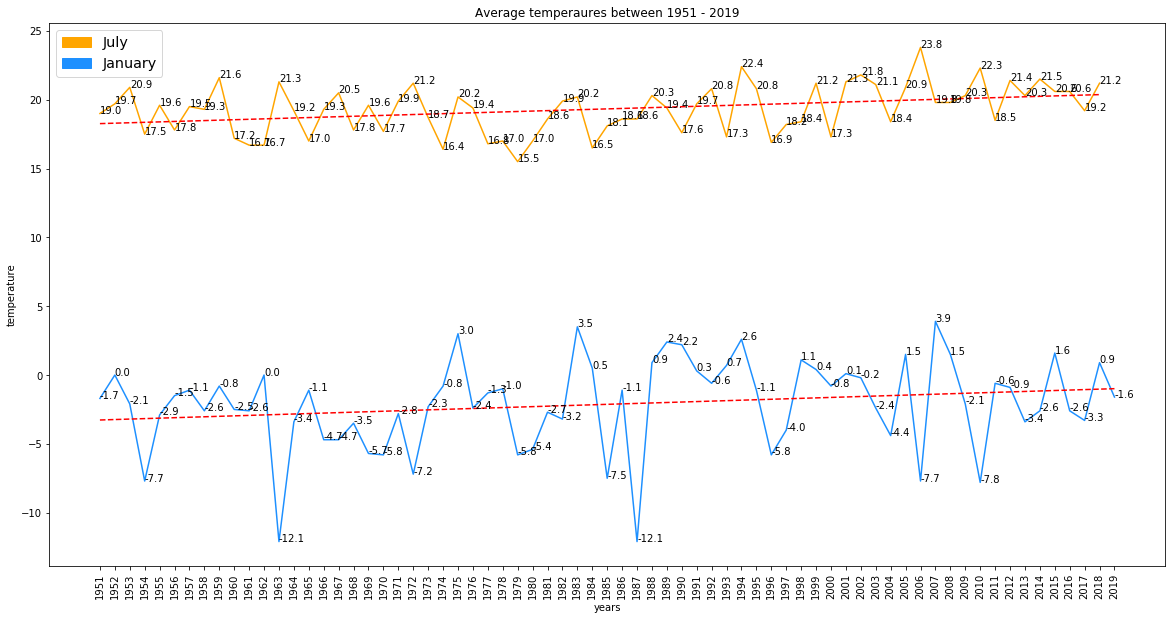

In [38]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

x_labels = single_yr_list
y_temp_jan = temp_jan_list
y_temp_jul = temp_jul_list

plt.plot(x_labels, y_temp_jan, color = 'dodgerblue')
for a,b in zip(x_labels, y_temp_jan): 
    plt.text(a, b, str(b))

z = np.polyfit(x_labels, y_temp_jan, 1)
p = np.poly1d(z)
plt.plot(x_labels,p(x_labels),"r--") 
    
plt.plot(x_labels, y_temp_jul, color = 'orange')
for a,b in zip(x_labels, y_temp_jul[:-1]):
    plt.text(a, b, str(b))

z = np.polyfit(x_labels[:-1], y_temp_jul[:-1], 1)
p = np.poly1d(z)
plt.plot(x_labels[:-1],p(x_labels[:-1]),"r--")
 
plt.title('Average temperaures between 1951 - 2019')

plt.xlabel('years')
plt.ylabel('temperature')
plt.xticks(x_labels, rotation = 'vertical')

orange_patch = mpatches.Patch(color = 'orange', label = 'July')
blue_patch = mpatches.Patch(color = 'dodgerblue', label = 'January')
plt.legend(handles = [orange_patch, blue_patch], loc=2, fontsize = 'x-large')

plt.rcParams["figure.figsize"] = (20,10)
plt.show()

In [ ]:
# step 2. daily avg yearly

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

yr_list = []

imgw_page = 'https://dane.imgw.pl/data/dane_pomiarowo_obserwacyjne/dane_meteorologiczne/dobowe/klimat/'
page = urlopen(imgw_page)
soup = BeautifulSoup(page, 'html.parser')

for link in soup.find_all('a', href=True):
    if str(link.string)[0].isdigit():
        yr_list.append(str(link.string)[:-1])
print(yr_list)

['1951_1955', '1956_1960', '1961_1965', '1966_1970', '1971_1975', '1976_1980', '1981_1985', '1986_1990', '1991_1995', '1996_2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']


In [2]:
import pandas as pd

df = pd.read_fwf('https://dane.imgw.pl/data/dane_pomiarowo_obserwacyjne/dane_meteorologiczne/dobowe/klimat/k_d_t_format.txt', header=None)
head_list = df[0].values.tolist()

del head_list[-1]

for x in range(len(head_list)):
    head_list[x] = head_list[x].split("  ")[0]
    head_list[x] = head_list[x].split(" 6")[0]
print(head_list)

['Kod stacji', 'Nazwa stacji', 'Rok', 'Miesiąc', 'Dzień', 'Średnia dobowa temperatura', 'Status pomiaru TEMP', 'Średnia dobowa wilgotność względna [%]', 'Status pomiaru WLGS', 'Średnia dobowa prędkość wiatru [m/s]', 'Status pomiaru FWS', 'Średnie dobowe zachmurzenie ogólne [oktanty]', 'Status pomiaru NOS']


In [3]:
from zipfile import ZipFile
from io import BytesIO
from urllib.request import urlopen

temp_df = pd.DataFrame()

mth_list = ['01','02','03','04','05','06','07','08','09','10','11','12']

for obs_year in yr_list:
    if len(obs_year) > 4:
        temp_list = obs_year.split('_')
        min_temp_list = int(min(temp_list))
        max_temp_list = int(max(temp_list)) + 1
        for det_year in range(min_temp_list, max_temp_list):
            url = urlopen('https://dane.imgw.pl/data/dane_pomiarowo_obserwacyjne/dane_meteorologiczne/dobowe/klimat/' + obs_year + '/' + str(det_year) + '_k.zip')
            file = ZipFile(BytesIO(url.read()))
            climate_csv = file.open('k_d_t_' + str(det_year) + '.csv')
            temp_yr_df = pd.read_csv(climate_csv, header=None, encoding ='windows-1250', names=head_list)
            temp_df = pd.concat([temp_df, temp_yr_df], ignore_index=True)
    else:
        try:
            for obs_month in mth_list:
                url = urlopen('https://dane.imgw.pl/data/dane_pomiarowo_obserwacyjne/dane_meteorologiczne/dobowe/klimat/' + obs_year + '/' + obs_year + '_' + obs_month + '_k.zip')
                file = ZipFile(BytesIO(url.read()))
                climate_csv = file.open('k_d_t_' + obs_month + '_' + obs_year + '.csv')
                temp_yr_df = pd.read_csv(climate_csv, header=None, encoding ='windows-1250', names=head_list)
                temp_df = pd.concat([temp_df, temp_yr_df], ignore_index=True)
        except:
            break
temp_df

,Kod stacji,Nazwa stacji,Rok,Miesiąc,Dzień,Średnia dobowa temperatura,Status pomiaru TEMP,Średnia dobowa wilgotność względna [%],Status pomiaru WLGS,Średnia dobowa prędkość wiatru [m/s],Status pomiaru FWS,Średnie dobowe zachmurzenie ogólne [oktanty],Status pomiaru NOS
0,249220040,DYNÓW,1951,1,1,-0.6,NaN,84.8,NaN,6.0,NaN,4.7,NaN
1,249220040,DYNÓW,1951,1,2,2.2,NaN,73.0,NaN,1.3,NaN,2.7,NaN
2,249220040,DYNÓW,1951,1,3,-0.8,NaN,84.5,NaN,1.3,NaN,3.3,NaN
3,249220040,DYNÓW,1951,1,4,1.6,NaN,92.8,NaN,1.7,NaN,8.0,NaN
4,249220040,DYNÓW,1951,1,5,1.6,NaN,90.3,NaN,0.7,NaN,8.0,NaN
5,249220040,DYNÓW,1951,1,6,2.0,NaN,81.8,NaN,3.7,NaN,8.0,NaN
6,249220040,DYNÓW,1951,1,7,2.9,NaN,84.5,NaN,7.0,NaN,3.7,NaN
7,249220040,DYNÓW,1951,1,8,2.9,NaN,74.8,NaN,10.7,NaN,8.0,NaN
8,249220040,DYNÓW,1951,1,9,3.8,NaN,83.3,NaN,4.3,NaN,7.3,NaN
9,249220040,DYNÓW,1951,1,10,0.9,NaN,79.3,NaN,4.0,NaN,2.7,NaN


In [4]:
temp_df = temp_df.sort_values(['Rok', 'Nazwa stacji', 'Miesiąc', 'Dzień'])

temp_df

,Kod stacji,Nazwa stacji,Rok,Miesiąc,Dzień,Średnia dobowa temperatura,Status pomiaru TEMP,Średnia dobowa wilgotność względna [%],Status pomiaru WLGS,Średnia dobowa prędkość wiatru [m/s],Status pomiaru FWS,Średnie dobowe zachmurzenie ogólne [oktanty],Status pomiaru NOS
8360,252239995,BIAŁA PODLASKA,1951,1,1,-4.4,NaN,85.5,NaN,3.0,NaN,8.0,NaN
8361,252239995,BIAŁA PODLASKA,1951,1,2,-1.2,NaN,89.8,NaN,3.7,NaN,5.3,NaN
8362,252239995,BIAŁA PODLASKA,1951,1,3,0.8,NaN,86.3,NaN,5.3,NaN,6.7,NaN
8363,252239995,BIAŁA PODLASKA,1951,1,4,-0.1,NaN,94.5,NaN,2.7,NaN,8.0,NaN
8364,252239995,BIAŁA PODLASKA,1951,1,5,-0.7,NaN,96.5,NaN,1.3,NaN,8.0,NaN
8365,252239995,BIAŁA PODLASKA,1951,1,6,1.9,NaN,92.3,NaN,5.3,NaN,8.0,NaN
8366,252239995,BIAŁA PODLASKA,1951,1,7,1.9,NaN,91.0,NaN,3.0,NaN,8.0,NaN
8367,252239995,BIAŁA PODLASKA,1951,1,8,1.5,NaN,88.0,NaN,7.3,NaN,8.0,NaN
8368,252239995,BIAŁA PODLASKA,1951,1,9,1.1,NaN,86.5,NaN,3.0,NaN,8.0,NaN
8369,252239995,BIAŁA PODLASKA,1951,1,10,1.8,NaN,68.0,NaN,9.7,NaN,8.0,NaN


In [9]:
temp_warsz = temp_df.loc[(temp_df['Nazwa stacji'].str.contains('WARSZAWA-BIELANY'))].copy()
temp_warsz = temp_warsz.reset_index(drop=True)
temp_warsz = temp_warsz.dropna(how='all', axis=1)
temp_warsz

,Kod stacji,Nazwa stacji,Rok,Miesiąc,Dzień,Średnia dobowa temperatura,Średnia dobowa wilgotność względna [%],Średnia dobowa prędkość wiatru [m/s],Średnie dobowe zachmurzenie ogólne [oktanty],Status pomiaru NOS
0,252200150,WARSZAWA-BIELANY,1951,1,1,-3.7,85.5,3.3,6.0,NaN
1,252200150,WARSZAWA-BIELANY,1951,1,2,-1.3,87.5,2.7,5.3,NaN
2,252200150,WARSZAWA-BIELANY,1951,1,3,2.2,70.8,5.3,8.0,NaN
3,252200150,WARSZAWA-BIELANY,1951,1,4,0.5,91.8,1.7,5.3,NaN
4,252200150,WARSZAWA-BIELANY,1951,1,5,-0.6,92.8,2.0,8.0,NaN
5,252200150,WARSZAWA-BIELANY,1951,1,6,2.3,93.0,3.7,8.0,NaN
6,252200150,WARSZAWA-BIELANY,1951,1,7,2.7,92.8,5.0,8.0,NaN
7,252200150,WARSZAWA-BIELANY,1951,1,8,1.7,86.0,8.3,8.0,NaN
8,252200150,WARSZAWA-BIELANY,1951,1,9,1.8,87.8,2.3,7.0,NaN
9,252200150,WARSZAWA-BIELANY,1951,1,10,1.6,75.5,10.3,6.7,NaN


In [29]:
temp_year = temp_warsz.groupby('Rok')['Średnia dobowa temperatura'].mean().round(1).tolist()
temp_year = temp_year[:-1]
temp_year

[9.1,
 7.7,
 8.8,
 7.5,
 8.1,
 6.5,
 8.7,
 8.1,
 8.8,
 8.3,
 8.9,
 7.5,
 7.4,
 7.8,
 7.1,
 8.7,
 9.3,
 8.4,
 7.3,
 7.5,
 8.7,
 8.2,
 8.4,
 8.7,
 9.7,
 7.6,
 8.6,
 7.6,
 7.9,
 7.1,
 8.4,
 9.1,
 9.9,
 8.5,
 7.4,
 8.2,
 7.1,
 8.9,
 10.1,
 10.0,
 8.6,
 9.4,
 8.3,
 9.5,
 8.8,
 7.2,
 8.3,
 8.7,
 9.5,
 10.2,
 8.9,
 9.8,
 9.0,
 8.9,
 8.9,
 9.4,
 10.2,
 10.3,
 9.1,
 8.1,
 9.4,
 9.1,
 9.1,
 10.1,
 10.8,
 10.4,
 9.7,
 10.4]

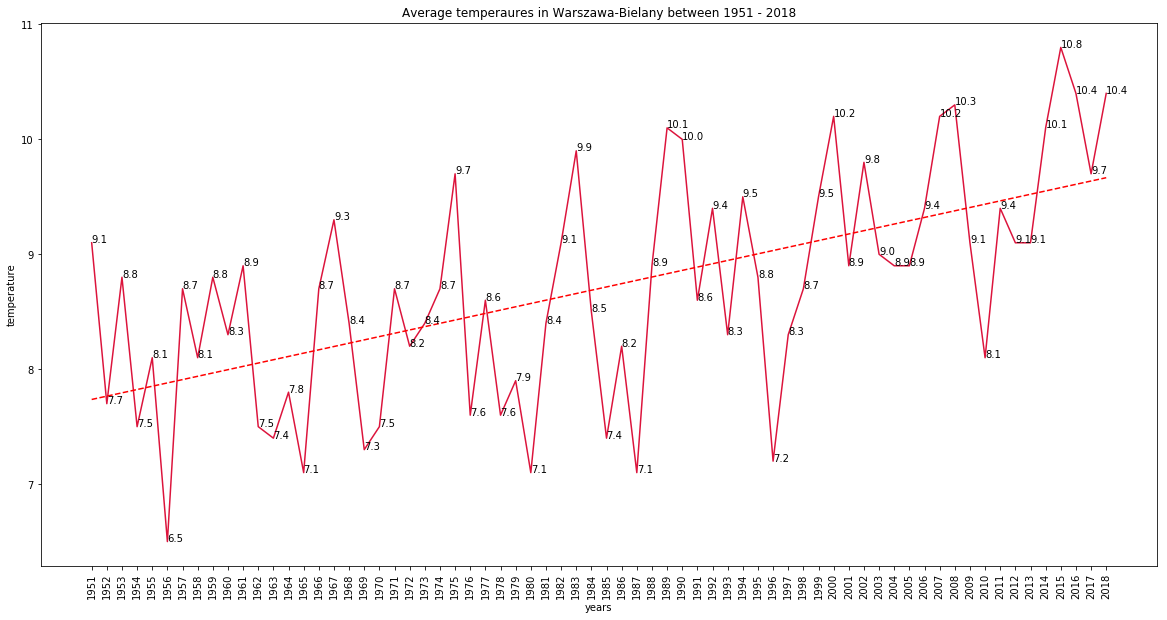

In [30]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

x_labels = single_yr_list[:-1]
y_temp_year = temp_year

plt.plot(x_labels, y_temp_year, color = 'crimson')
for a,b in zip(x_labels, y_temp_year): 
    plt.text(a, b, str(b))

z = np.polyfit(x_labels, y_temp_year, 1)
p = np.poly1d(z)
plt.plot(x_labels,p(x_labels),"r--") 
    
plt.title('Average temperaures in Warszawa-Bielany between 1951 - 2018')

plt.xlabel('years')
plt.ylabel('temperature')
plt.xticks(x_labels, rotation = 'vertical')

blue_patch = mpatches.Patch(color = 'crimson', label = 'January')
# plt.legend(handles = [blue_patch], loc=2, fontsize = 'x-large')

plt.rcParams["figure.figsize"] = (20,10)
plt.show()

In [ ]:
# Precipitation

In [ ]:
# saving to csv
export_csv = new_df.to_csv (r'C:\Users\admin\Desktop\export_dataframe.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path